In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

PATH = os.path.abspath('.') 

In [2]:
def drawGantChart(fromFilename = 'gantData.csv', toFilename = 'gantFig.png'):
    """
    使用甘特图时间表绘制甘特图
    fromFilename  时间表csv文件名
    toFilename    甘特图文件名
    如果想改变颜色，颜色名参考：https://matplotlib.org/users/colors.html
    """
    plt.rcParams['font.sans-serif']=['SimHei'] # 用来正常显示中文标签  
    plt.rcParams['axes.unicode_minus']=False # 用来正常显示负号  

    height=16 # 柱体高度，设为2的整数倍，方便Y轴label居中，如果设的过大，柱体间的间距就看不到了，需要修改下面间隔为更大的值
    interval=4 # 柱体间的间隔
    # colors = ("turquoise","crimson","black","red","yellow","green","brown","blue") # 颜色，不够再加
    colors = ("wheat","tan","lavender","lightblue","silver","pink") # 颜色，不够再加
    # colors = ("ivory","ivory","ivory","ivory","ivory","ivory") # 颜色，不够再加
    x_label=u"调度时刻" # 设置x轴label

    # df = pd.read_csv(io.StringIO(data), header=None, names=["Machine", "Start", "Finish","Title"] )
    df = pd.read_csv(PATH+"\\"+fromFilename, header=None, names=["Machine", "Start", "Finish","Title"])
    df["Diff"] = df.Finish - df.Start
    fig,ax=plt.subplots(figsize=(30,10))
    labels=[]
    count=0;
    for i,machine in enumerate(df.groupby("Machine")):
        labels.append(machine[0])
        data=machine[1]
        for index,row in data.iterrows():
    #         ax.broken_barh([(row["Start"],row["Diff"])], ((height+interval)*i+interval,height), facecolors=colors[i], edgecolor='brown')
    #         ax.broken_barh([(row["Start"],row["Diff"])], ((height+interval)*i+interval,height), facecolors='ivory', edgecolor='brown')
            if(row["Title"] == '*'):
                ax.broken_barh([(row["Start"],row["Diff"])], ((height+interval)*i+interval,height), facecolors='navy', edgecolor='brown')
            else:
#                 ax.broken_barh([(row["Start"],row["Diff"])], ((height+interval)*i+interval,height), facecolors=colors[int(row['Title'][0])], edgecolor='brown')
                ax.broken_barh([(row["Start"],row["Diff"])], ((height+interval)*i+interval,height), facecolors=colors[int(row['Title'].split('-')[0])], edgecolor='brown')  # 使显示的lot号、sublot号、机器号都能适用于一位数以上的
#             plt.text(row["Start"], (height+interval)*(i+1),row['Title'],fontsize=10)  # fontsize='x-small'
            plt.text(row["Start"], (height+interval)*(i+1)-height/2,row['Title'],fontsize=10)  # fontsize='x-small'
            if(row["Finish"] > count):
                count = row["Finish"]
    ax.set_ylim(0, (height+interval)*len(labels)+interval)
    ax.set_xlim(0, count+2)
    ax.set_xlabel(x_label)
    ax.set_yticks(range(int(interval+height/2),(height+interval)*len(labels),(height+interval)))
    ax.set_yticklabels(labels)
    # ax.grid(True) # 显示网格
    ax.xaxis.grid(True) # 只显示x轴网格
    # ax.yaxis.grid(True) # 只显示y轴网格
    plt.savefig(PATH+"\\"+toFilename,dpi=160)
    plt.show()


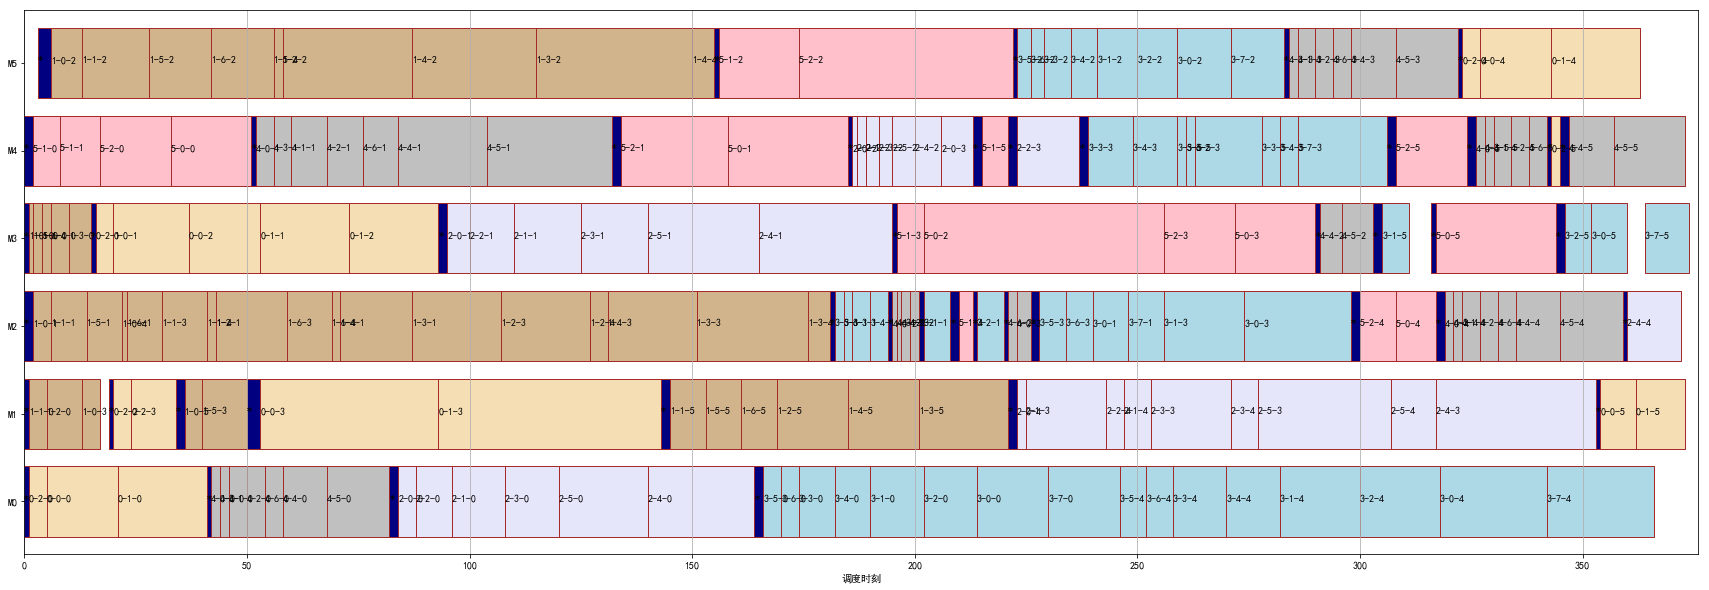

In [4]:
drawGantChart()

In [ ]:
def decodeAFixedIndividual(codeLists, filename):
    """
    功能：       输入三条编码，观察解码过程，并生成甘特图

    输入：
    codeLists    为一个list，里面放着三条编码
    filename     一个文件前缀名，例如'gantData'
    """
    sublotNum = codeLists[0]
    sublotSizes = codeLists[1]
    preferenceCode = codeLists[2]

    # 创建新个体，初始化，并赋值
    bestIndividual = self.individualClassName(lotNum, lotSizes, machineNum)
    bestIndividual.initializeIndividual()
    for i, item in enumerate(bestIndividual.segment1.lotSplitingCode):
        item.sublotNum = sublotNum[i]
        item.sublotSizes = sublotSizes[i]
    bestIndividual.segment2.preferenceCode = preferenceCode

    # 解码，生成甘特时间表
    solu = self.solutionClassName(bestIndividual)
    solu.run(mute=1)
    # solu.printResults()
    solu.generateGantTimetable(filename = "gantFiles\\" + filename)
    print('makespan: ', solu.getMakespan())

    # 绘制甘特图
    csvName = filename + '.csv'
    pngName = filename + '.png'
    drawGantChart(fromFilename = "gantFiles\\" + csvName, toFilename = "gantFiles\\" + pngName)
    print('gantChart figure', pngName, 'done: {}'.format(PATH + "\\gantFiles\\" + pngName))